# Прогнозирование потребления электричества
Источник: https://github.com/vgarshin/arkh_lab В.Гаршин для Архипелаг2035 (2020г.)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('cpt_power_data.csv', sep='\t', encoding='utf-8', index_col=0)
df['timestamp_value'] = pd.to_datetime(df['timestamp_value'])


# Обзор структуры и объема данных

In [3]:
print('Размерность датафрейма строк/столбцов: ', df.shape)

Размерность датафрейма строк/столбцов:  (44160, 24)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44160 entries, 0 to 44063
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   message_class          44160 non-null  int64         
 1   message_text           0 non-null      float64       
 2   message_version        44160 non-null  int64         
 3   message_number         44160 non-null  int64         
 4   daylightsavingtime     44160 non-null  int64         
 5   day                    44160 non-null  int64         
 6   timestamp              44160 non-null  int64         
 7   name                   44160 non-null  object        
 8   inn                    44160 non-null  int64         
 9   area_timezone          44160 non-null  int64         
 10  area_text              0 non-null      float64       
 11  measuringpoint_code    44160 non-null  int64         
 12  measuringpoint_text    0 non-null      float64       
 13  m

# Содержание данных

In [24]:
df.head()

,message_class,message_text,message_version,message_number,daylightsavingtime,day,timestamp,name,inn,area_timezone,area_text,measuringpoint_code,measuringpoint_text,measuringpoint_name,measuringpoint_serial,measuringchannel_code,measuringchannel_text,measuringchannel_desc,period_start,period_text,period_end,value_status,value_text,timestamp_value
0,80020,NaN,2,212,2,20180301,20180402094127,Umbrella Corp,7766553322,1,NaN,9987268111202774,NaN,11202774,11202774,1,NaN,акт. прием,0,NaN,30,0,87.8,2018-03-01 00:00:00
1,80020,NaN,2,212,2,20180301,20180402094127,Umbrella Corp,7766553322,1,NaN,9987268111202774,NaN,11202774,11202774,1,NaN,акт. прием,30,NaN,100,0,87.4,2018-03-01 00:30:00
2,80020,NaN,2,212,2,20180301,20180402094127,Umbrella Corp,7766553322,1,NaN,9987268111202774,NaN,11202774,11202774,1,NaN,акт. прием,100,NaN,130,0,88.4,2018-03-01 01:00:00
3,80020,NaN,2,212,2,20180301,20180402094127,Umbrella Corp,7766553322,1,NaN,9987268111202774,NaN,11202774,11202774,1,NaN,акт. прием,130,NaN,200,0,88.8,2018-03-01 01:30:00
4,80020,NaN,2,212,2,20180301,20180402094127,Umbrella Corp,7766553322,1,NaN,9987268111202774,NaN,11202774,11202774,1,NaN,акт. прием,200,NaN,230,0,88.0,2018-03-01 02:00:00


In [25]:
print('Количество уникальных данных и примеры')
print('Тип(кол-во уник.) \t / Пример')
for col in df:
    print(f'{col}:', len(df[col].unique()), '\t/', df[col].unique()[:3])

Количество уникальных данных и примеры
Тип(кол-во уник.) 	 / Пример
message_class: 1 	/ [80020]
message_text: 1 	/ [nan]
message_version: 1 	/ [2]
message_number: 92 	/ [212 213 214]
daylightsavingtime: 1 	/ [2]
day: 92 	/ [20180301 20180302 20180303]
timestamp: 22 	/ [20180402094127 20180402094128 20180402094129]
name: 1 	/ ['Umbrella Corp']
inn: 1 	/ [7766553322]
area_timezone: 1 	/ [1]
area_text: 1 	/ [nan]
measuringpoint_code: 10 	/ [9987268111202774 9987268111202786 9987268111202793]
measuringpoint_text: 1 	/ [nan]
measuringpoint_name: 10 	/ [11202774 11202786 11202793]
measuringpoint_serial: 10 	/ [11202774 11202786 11202793]
measuringchannel_code: 1 	/ [1]
measuringchannel_text: 1 	/ [nan]
measuringchannel_desc: 1 	/ ['акт. прием']
period_start: 48 	/ [  0  30 100]
period_text: 1 	/ [nan]
period_end: 48 	/ [ 30 100 130]
value_status: 1 	/ [0]
value_text: 1651 	/ [87.8 87.4 88.4]
timestamp_value: 4416 	/ ['2018-03-01T00:00:00.000000000' '2018-03-01T00:30:00.000000000'
 '2018-03-0

In [13]:
print('Точек(устройств) измерения:', len(df['measuringpoint_serial'].unique()))
print('Уникальных каналов измерений:', len(df['measuringchannel_code'].unique()))

print('Дней:', len(df['day'].unique()))
print('Длина временного ряда для точки:', int(df.shape[0] / len(df['measuringchannel_code'].unique()) / len(df['measuringpoint_serial'].unique())))

Точек(устройств) измерения: 10
Уникальных каналов измерений: 1
Дней: 92
Длина временного ряда для точки: 4416


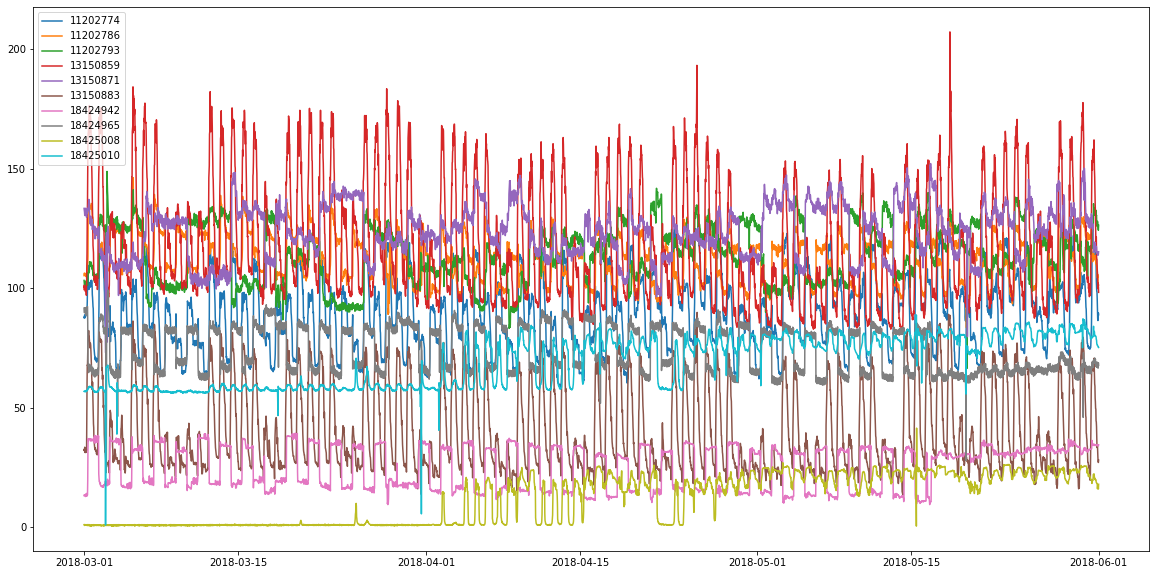

In [10]:
plt.figure(figsize=(20, 20))
for ch_serial in df['measuringpoint_serial'].unique():
    plt.plot(df[df['measuringpoint_serial'] == ch_serial].timestamp_value,
             df[df['measuringpoint_serial'] == ch_serial].value_text,
             label=ch_serial)
plt.legend()
plt.show()

### Пример данных в одной точке измерения

In [14]:
ch_serial = df['measuringpoint_serial'].unique()[0]
channel = pd.DataFrame(
    data=list(df[df['measuringpoint_serial'] == ch_serial].value_text),
    index=list(df[df['measuringpoint_serial'] == ch_serial].timestamp_value)
)
channel.columns = ['pwr']
print(channel.shape)
channel.head()

(4416, 1)


,pwr
2018-03-01 00:00:00,87.8
2018-03-01 00:30:00,87.4
2018-03-01 01:00:00,88.4
2018-03-01 01:30:00,88.8
2018-03-01 02:00:00,88.0


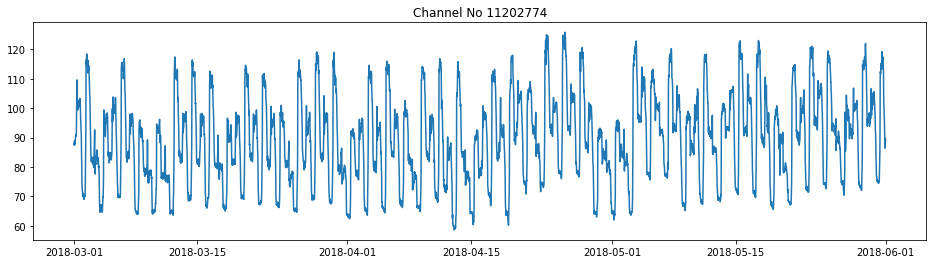

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(channel)
plt.title(f'Channel No {ch_serial}')
plt.show()

### Изменения данны по всем точкам измерения в одной точке измерения


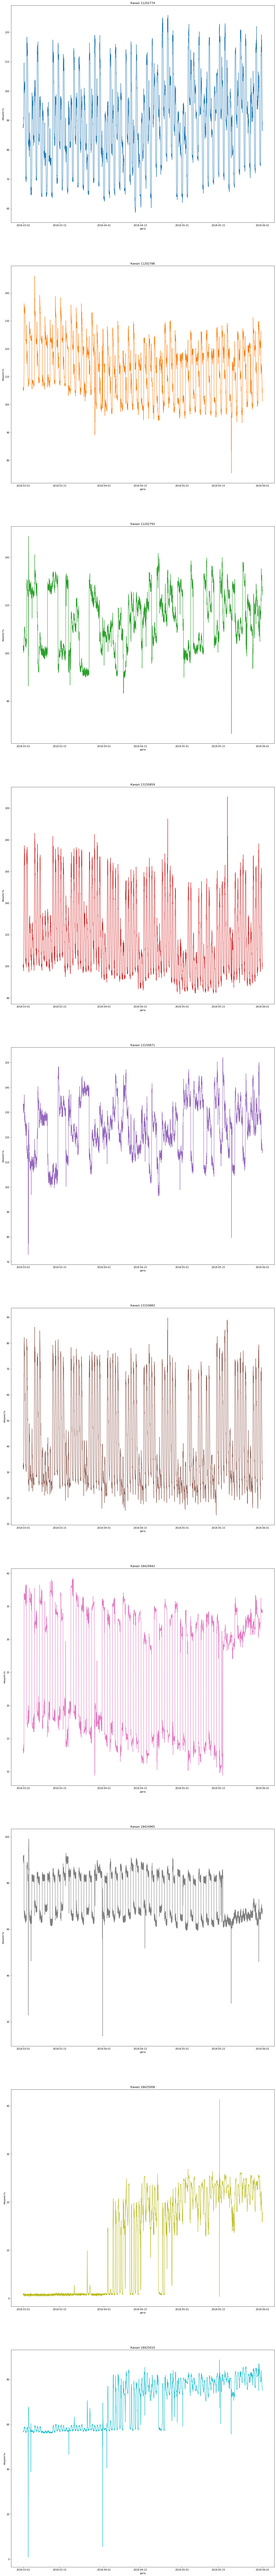

In [22]:
colors = list(mcolors.TABLEAU_COLORS.values())
qtyCh = len(df['measuringpoint_serial'].unique())

fig, axes = plt.subplots(qtyCh,1, figsize=(20, 20 * qtyCh))
# i = 0
for i, ch_serial in enumerate(df['measuringpoint_serial'].unique()):
    axes[i].plot(df[df['measuringpoint_serial'] == ch_serial].timestamp_value,
             df[df['measuringpoint_serial'] == ch_serial].value_text,
             label=ch_serial, color=colors[i])
    axes[i].set_title(f'Канал {ch_serial}')
    axes[i].set_xlabel('дата')
    axes[i].set_ylabel('мощность')
plt.show()